In [74]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [75]:
df=pd.read_csv('insurance_data.csv')

In [76]:
df

,Age,Bought Insurance
0,21,no
1,48,yes
2,32,yes
3,41,yes
4,20,no
5,35,yes
6,20,no
7,23,no
8,37,yes
9,24,no


# y=1/1+e^-x

In [77]:
df['Bought Insurance'].replace({'no':'0','yes':'1'},inplace=True)  #converting categorical datas to binary format

C:\Users\biraj\AppData\Local\Temp\ipykernel_2216\2448721424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bought Insurance'].replace({'no':'0','yes':'1'},inplace=True)  #converting categorical datas to binary format


In [78]:
df

,Age,Bought Insurance
0,21,0
1,48,1
2,32,1
3,41,1
4,20,0
5,35,1
6,20,0
7,23,0
8,37,1
9,24,0


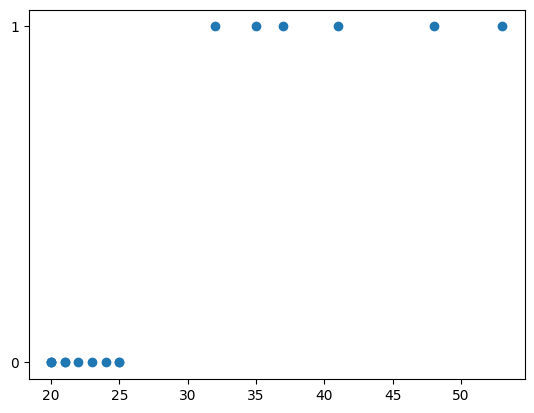

In [79]:
plt.scatter(x='Age', y='Bought Insurance',data=df)

In [80]:
# Splitting datasets in train and test
X_train,X_test,y_train,y_test=train_test_split(df[['Age']],df[['Bought Insurance']], test_size=0.2)

In [81]:
print(X_train)

    Age
6    20
7    23
2    32
10   25
13   20
4    20
14   22
9    24
3    41
12   53
5    35
11   21


In [82]:
print(y_test)

   Bought Insurance
15                0
1                 1
0                 0
8                 1


In [83]:
lr=LogisticRegression()

In [84]:
lr.fit(X_train,y_train)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [85]:
lr.predict(X_test)

array(['0', '1', '0', '1'], dtype=object)

In [86]:
lr.predict([[60]])

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['1'], dtype=object)

In [87]:
lr.predict([[40]])

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['1'], dtype=object)

In [88]:
lr.predict([[18]])

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['0'], dtype=object)

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


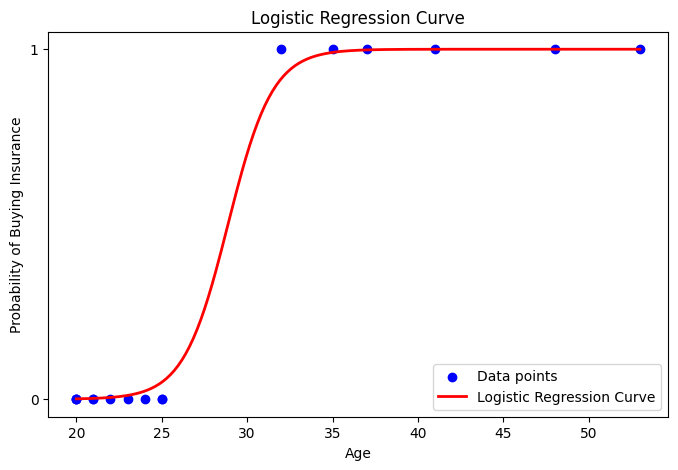

In [90]:
# Logistic regression curve
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Bought Insurance'], color='blue', label='Data points')

# Generate a sequence of ages from minimum to maximum for prediction
age_range = np.linspace(df['Age'].min(), df['Age'].max(), 300).reshape(-1, 1)
insurance_prob = lr.predict_proba(age_range)[:, 1]

plt.plot(age_range, insurance_prob, color='red', linewidth=2, label='Logistic Regression Curve')
plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.title('Logistic Regression Curve')
plt.legend()
plt.show()